In [1]:
# !pip install 'gym[box2d]'
# !apt-get install python-opengl -y
# !apt install xvfb -y
# !pip install pyvirtualdisplay
# !pip install https://github.com/pyglet/pyglet/archive/pyglet-1.5-maintenance.zip
# !apt-get install ffmpeg -y

In [2]:
# env.render() gives error in Colab
# below code solves display error
# https://github.com/openai/gym/issues/1898


from pyvirtualdisplay import Display
display = Display(visible=0,size=(600,600))
display.start()

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from maze_env import Maze
from utils import plot_policy, plot_action_values, test_agent
np.random.seed(34)

In [4]:
env = Maze()

In [5]:
action_values = np.zeros((5, 5, 4))

In [6]:
def policy(state, epsilon=0.):
    if np.random.random() < epsilon:
        return np.random.choice(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

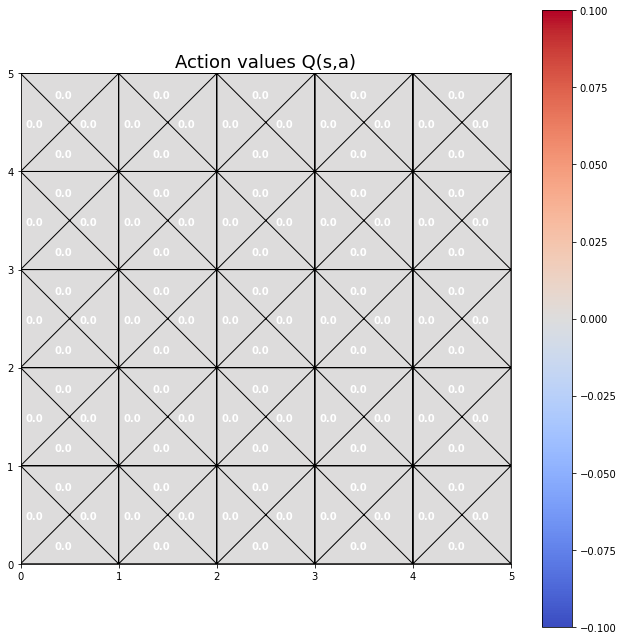

In [7]:
plot_action_values(action_values)

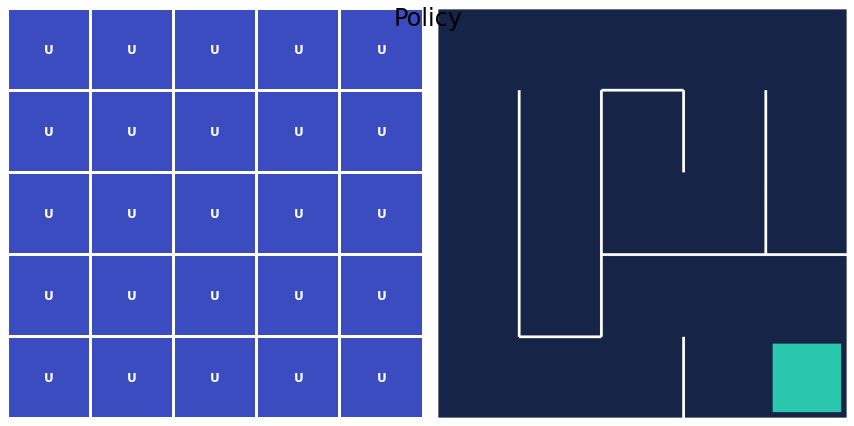

In [8]:
plot_policy(action_values, env.render(mode='rgb_array'))

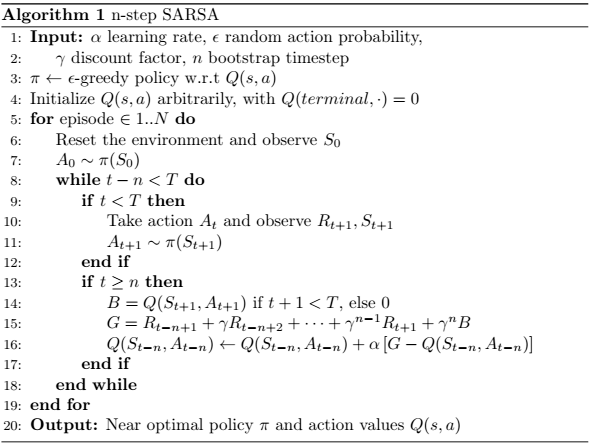

In [9]:
def n_step_sarsa(action_values, policy, episodes, alpha=0.1, gamma=0.99, epsilon=0.2, n=8):
    
    for episode in range(1, episodes + 1):
        print(f"\rRunning episode {episode}/{episodes}...",end="")

        state = env.reset()
        action = policy(state,epsilon)

        transitions = []
        done = False
        t= 0

        while t-n < len(transitions):

            # execute action
            if not done:
                 next_state, reward, done, _ = env.step(action)
                 next_action = policy(next_state,epsilon)
                 transitions.append([state,action,reward])

            # update q value estimates

            if t >= n:
                G = (1-done) * action_values[next_state][next_action]

                for state_t, action_t, reward_t in reversed(transitions[t-n:]):
                     G = reward_t + gamma * G
                
                action_values[state_t][action_t] += alpha * (G-action_values[state_t][action_t])

            t = t + 1
            state = next_state
            action = next_action

In [10]:
n_step_sarsa(action_values, policy, 1000)

Running episode 1000/1000...

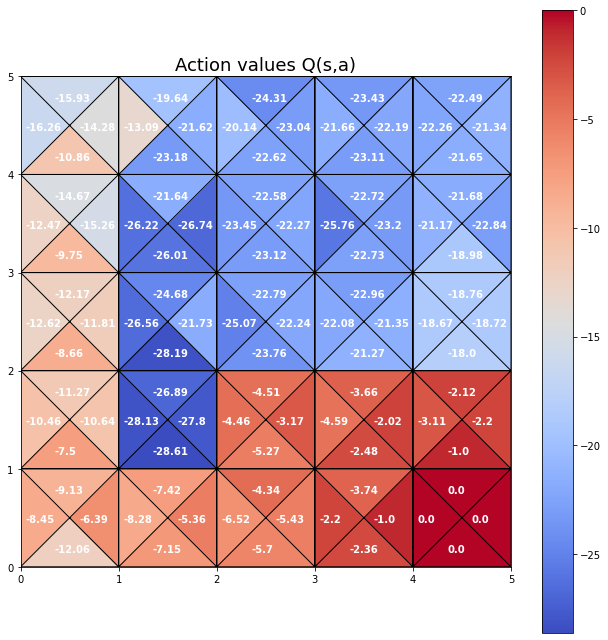

In [11]:
plot_action_values(action_values)

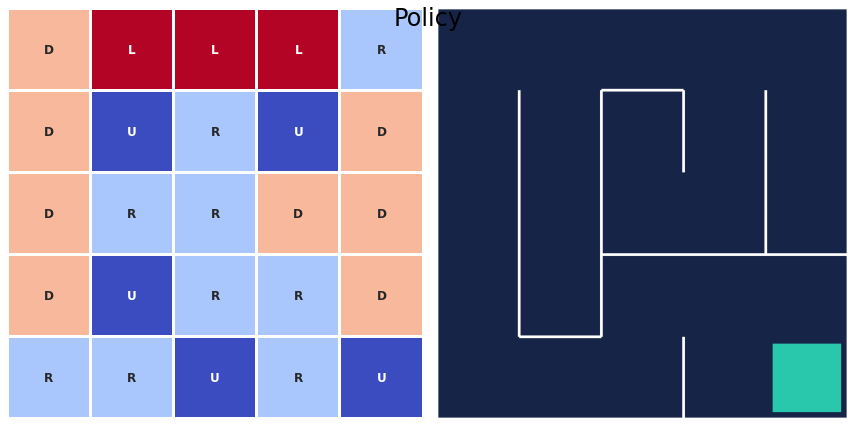

In [12]:
plot_policy(action_values, env.render(mode='rgb_array'))

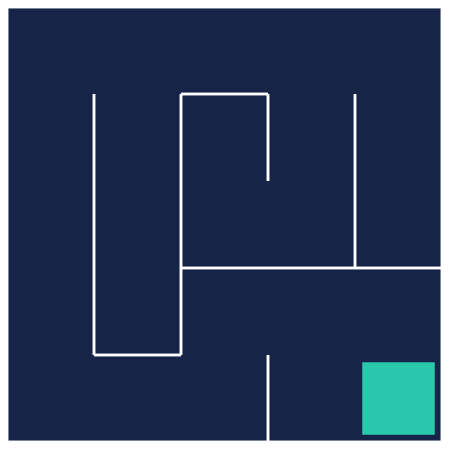

In [14]:
test_agent(env,policy, episodes=1)